#**Retail Sales Forecasting**

##**Step 0: Setup**

In [1]:
# Install Prophet
!pip install prophet
!pip install plotly


##**Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##**Step 2: Load the Data**

In [2]:
df=pd.read_csv('sales_data_sample.csv', encoding='latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


##**Step 3: Data Cleaning**

In [3]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
#Checking Null values and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
#Checking Duplicates
df[df.duplicated()]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [6]:
df['ORDERNUMBER'].unique()

array([10107, 10121, 10134, 10145, 10159, 10168, 10180, 10188, 10201,
       10211, 10223, 10237, 10251, 10263, 10275, 10285, 10299, 10309,
       10318, 10329, 10341, 10361, 10375, 10388, 10403, 10417, 10103,
       10112, 10126, 10140, 10150, 10163, 10174, 10183, 10194, 10206,
       10215, 10228, 10245, 10258, 10270, 10280, 10291, 10304, 10312,
       10322, 10333, 10347, 10357, 10369, 10381, 10391, 10411, 10424,
       10120, 10210, 10236, 10298, 10308, 10339, 10374, 10402, 10362,
       10105, 10119, 10129, 10143, 10155, 10167, 10178, 10186, 10197,
       10209, 10222, 10248, 10261, 10273, 10283, 10295, 10307, 10316,
       10325, 10337, 10350, 10359, 10373, 10384, 10395, 10400, 10414,
       10114, 10164, 10175, 10207, 10217, 10229, 10259, 10281, 10305,
       10313, 10334, 10370, 10425, 10108, 10122, 10135, 10147, 10169,
       10181, 10191, 10203, 10225, 10238, 10253, 10266, 10276, 10287,
       10300, 10310, 10320, 10363, 10389, 10419, 10117, 10127, 10142,
       10153, 10165,

In [7]:
# Droping high-cardinality or irrelevant columns

cols_to_drop = [
    'ORDERNUMBER', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'TERRITORY',
    'STATE', 'POSTALCODE', 'ADDRESSLINE2', 'ADDRESSLINE1', 'PHONE' ,'CITY' ,'CUSTOMERNAME'
]
df.drop(columns=cols_to_drop, inplace=True)

# Check result
df.info()


""" Dropped columns with high-cardinality text data (e.g., names, addresses, phone) that are unlikely to contribute to aggregate sales forecasting.
This reduces dimensionality and memory usage, and keeps the dataset focused on analytical variables."""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   QTR_ID           2823 non-null   int64  
 7   MONTH_ID         2823 non-null   int64  
 8   YEAR_ID          2823 non-null   int64  
 9   PRODUCTLINE      2823 non-null   object 
 10  MSRP             2823 non-null   int64  
 11  PRODUCTCODE      2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 308.9+ KB


' Dropped columns with high-cardinality text data (e.g., names, addresses, phone) that are unlikely to contribute to aggregate sales forecasting.\nThis reduces dimensionality and memory usage, and keeps the dataset focused on analytical variables.'

In [8]:
df['PRODUCTLINE']

,PRODUCTLINE
0,Motorcycles
1,Motorcycles
2,Motorcycles
3,Motorcycles
4,Motorcycles
...,...
2818,Ships
2819,Ships
2820,Ships
2821,Ships


##**Step 4: Monthly Sales Aggregation**

In [9]:
#Converted order dates to monthly periods and aggregated total sales.
#This time series is suitable input for Prophet, which expects ds (date) and y (value) columns.

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])  # ensure datetime format
# Group by Month
df['Month'] = df['ORDERDATE'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['SALES'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']
monthly_sales['ds'] = pd.to_datetime(monthly_sales['ds'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  COUNTRY          2823 non-null   object        
 13  DEALSIZE         2823 non-null   object        
 14  Month            2823 non-null   object 

##**Step 5: Forecast with Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/jvap4xtd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/q5jb2its.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13534', 'data', 'file=/tmp/tmp7zgix2k7/jvap4xtd.json', 'init=/tmp/tmp7zgix2k7/q5jb2its.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_model7l12x4p6/prophet_model-20250525080100.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:

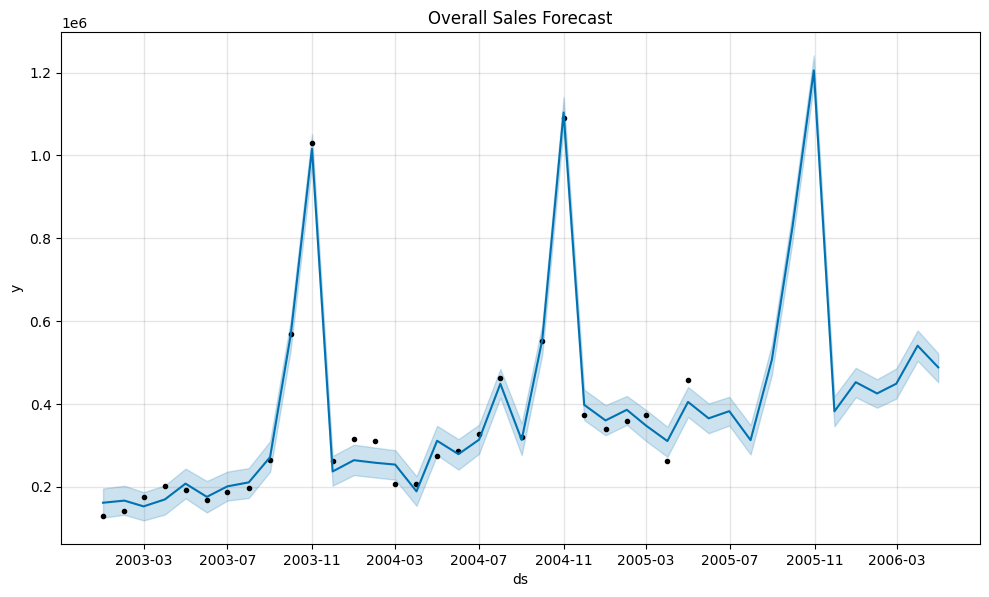

In [11]:
#Trained a Prophet model on the aggregated monthly sales data and forecasted the next 12 months.
#Prophet is robust for time series with seasonality and handles missing values and outliers fairly well.

model = Prophet()
model.fit(monthly_sales)

# Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Overall Sales Forecast")
plt.show()

# Interactive
px.line(forecast, x='ds', y='yhat', title='Monthly Sales Forecast').show()

##**Step 6: Visualize Forecast**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/keda0gim.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/5vh3qrqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33163', 'data', 'file=/tmp/tmp7zgix2k7/keda0gim.json', 'init=/tmp/tmp7zgix2k7/5vh3qrqq.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_modelqjn3zlpo/prophet_model-20250525080104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:

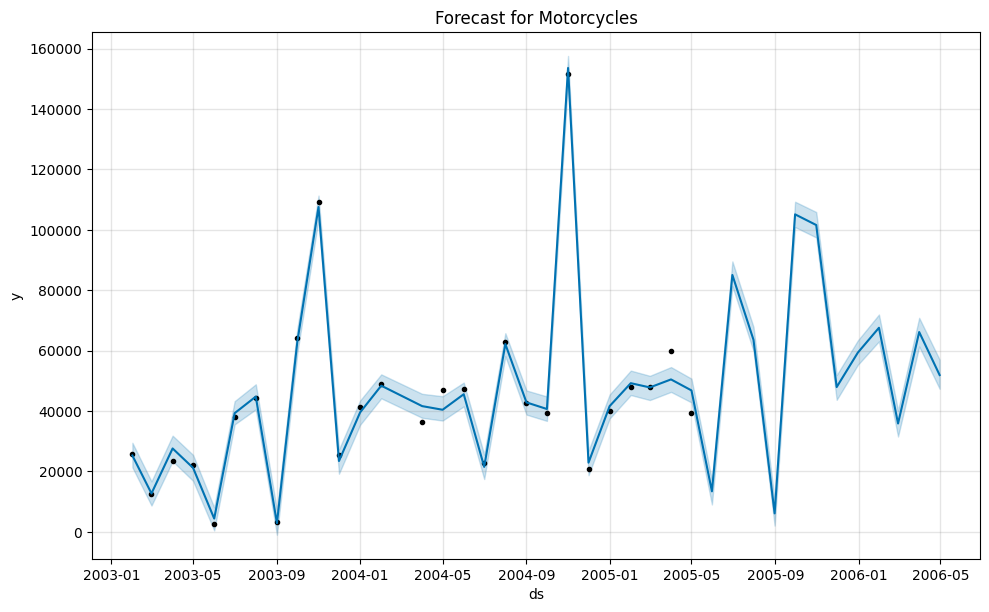

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/0x95it4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/12j0gcqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12990', 'data', 'file=/tmp/tmp7zgix2k7/0x95it4w.json', 'init=/tmp/tmp7zgix2k7/12j0gcqc.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_modelwjz4p_94/prophet_model-20250525080105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:

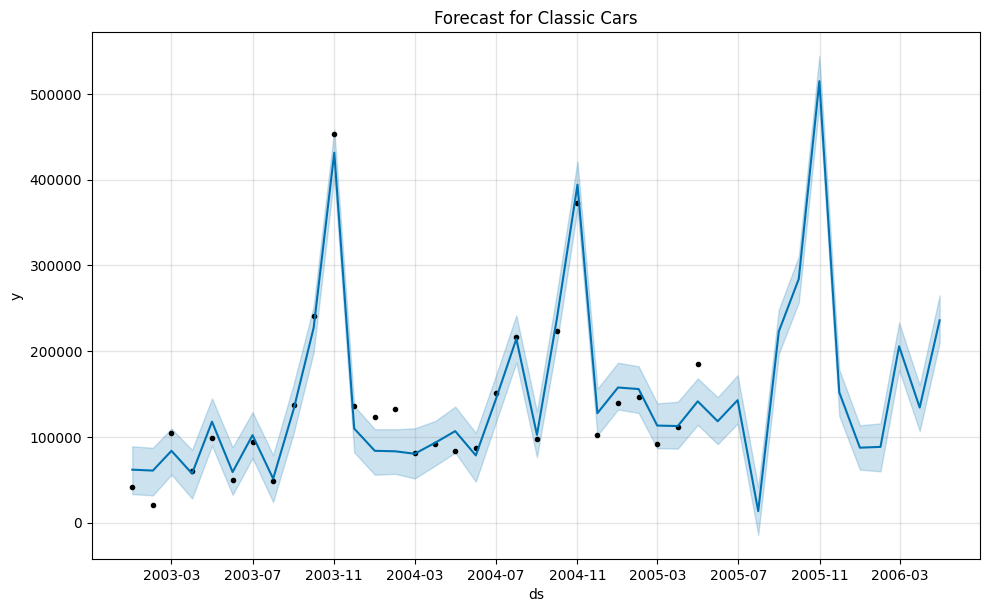

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/a2x1xs8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/3tk3mbbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40452', 'data', 'file=/tmp/tmp7zgix2k7/a2x1xs8l.json', 'init=/tmp/tmp7zgix2k7/3tk3mbbl.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_model23pfbudj/prophet_model-20250525080105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:

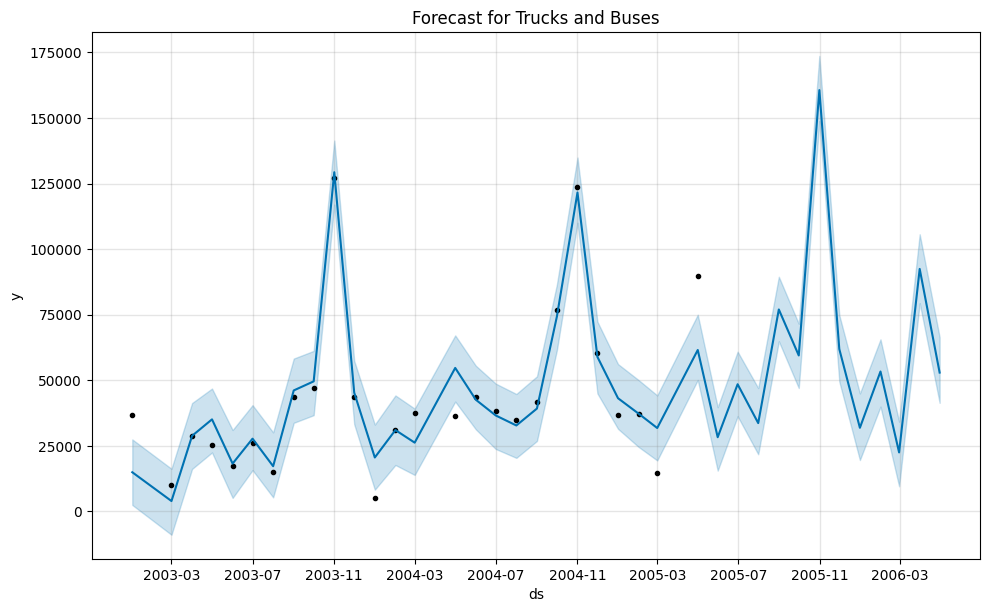

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/va9e686m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/75fj6te3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29048', 'data', 'file=/tmp/tmp7zgix2k7/va9e686m.json', 'init=/tmp/tmp7zgix2k7/75fj6te3.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_modell2qht6a4/prophet_model-20250525080106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:

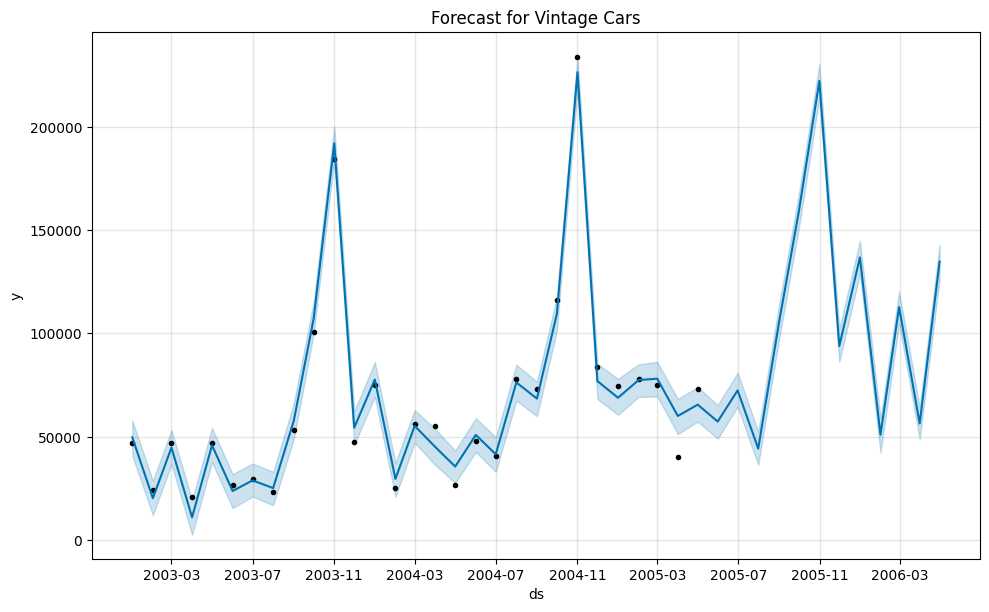

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/nsjgndb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/nqr6jxgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16411', 'data', 'file=/tmp/tmp7zgix2k7/nsjgndb8.json', 'init=/tmp/tmp7zgix2k7/nqr6jxgt.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_modelyjjr8834/prophet_model-20250525080106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:

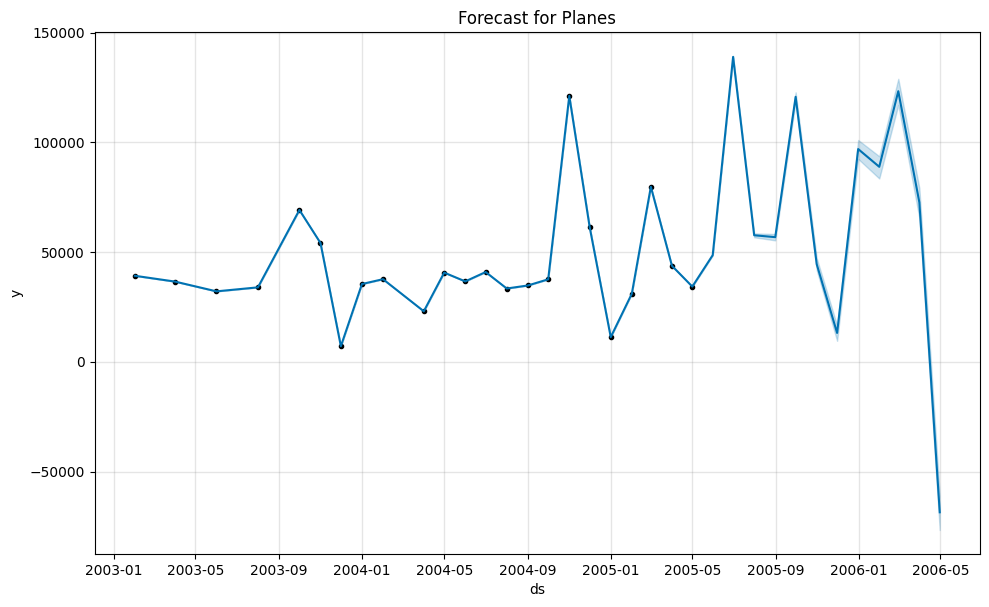

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/fqr9nvrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/9p1qec2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69554', 'data', 'file=/tmp/tmp7zgix2k7/fqr9nvrt.json', 'init=/tmp/tmp7zgix2k7/9p1qec2h.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_model3yve0m26/prophet_model-20250525080121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:

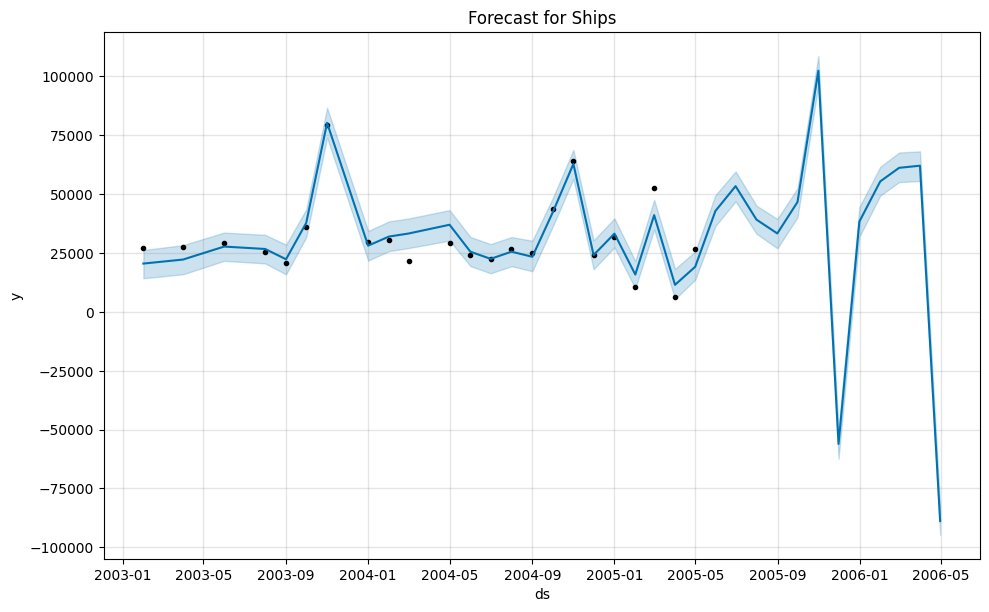

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/jca3hhfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/bhhzqik6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17785', 'data', 'file=/tmp/tmp7zgix2k7/jca3hhfy.json', 'init=/tmp/tmp7zgix2k7/bhhzqik6.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_model9r05y56v/prophet_model-20250525080122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:

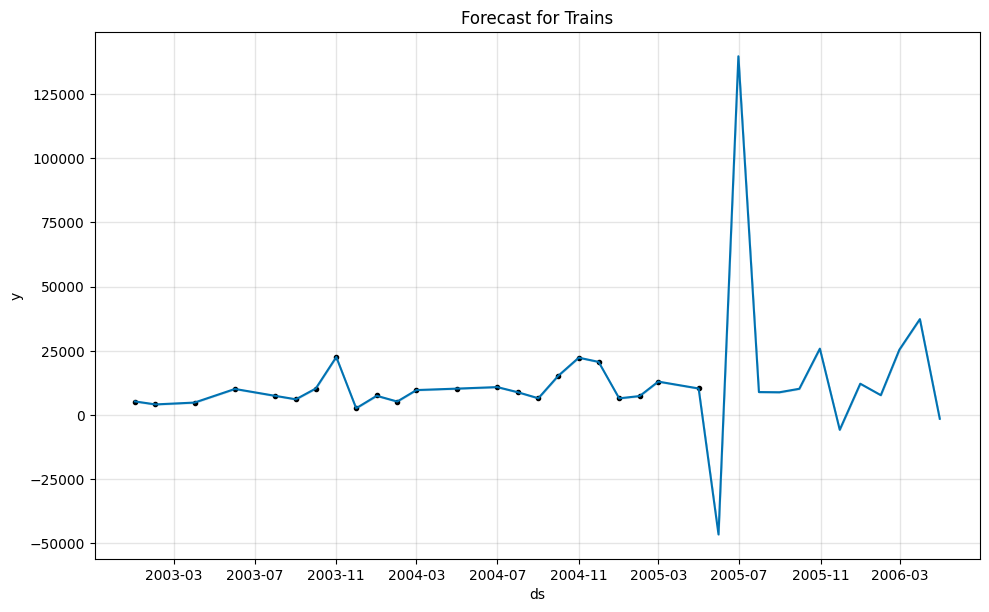

In [12]:
#Iteratively trained individual Prophet models for each product line. This enables granular insights into future trends for specific categories.
#Visualization for each forecast is plotted to explore patterns or anomalies per segment.

unique_products = df['PRODUCTLINE'].unique()

for product in unique_products:
    sub_df = df[df['PRODUCTLINE'] == product]
    sub_df['Month'] = sub_df['ORDERDATE'].dt.to_period('M').astype(str)
    product_sales = sub_df.groupby('Month')['SALES'].sum().reset_index()
    product_sales.columns = ['ds', 'y']
    product_sales['ds'] = pd.to_datetime(product_sales['ds'])

    m = Prophet()
    m.fit(product_sales)
    future = m.make_future_dataframe(periods=12, freq='M')
    forecast = m.predict(future)

    fig = m.plot(forecast)
    plt.title(f"Forecast for {product}")
    plt.show()

##**Step 7: Export Forecast for Streamlit Dashboard**

In [13]:
#Ensured the environment is equipped with the necessary tools: streamlit for dashboarding,
#pyngrok for public access, prophet for forecasting, and joblib for model serialization.


!pip install streamlit pyngrok prophet joblib --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [14]:
#Automated the generation of 12-month forecasts for each product line and saved all outputs into a single CSV file.
#This file powers the interactive dashboard and allows for scalable deployment.


from prophet import Prophet
all_forecasts = []

for product in df['PRODUCTLINE'].unique():
    df_product = df[df['PRODUCTLINE'] == product].copy()

    # Ensure datetime
    df_product['ORDERDATE'] = pd.to_datetime(df_product['ORDERDATE'])

    # Group by Month
    df_product['Month'] = df_product['ORDERDATE'].dt.to_period('M').astype(str)
    product_sales = df_product.groupby('Month')['SALES'].sum().reset_index()
    product_sales.columns = ['ds', 'y']
    product_sales['ds'] = pd.to_datetime(product_sales['ds'])


    # Skip if no sales
    if product_sales['y'].sum() == 0 or product_sales.shape[0] < 6:
        print(f"⚠️ Skipping {product}: Insufficient data")
        continue

    model = Prophet()
    model.fit(product_sales)

    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)


    merged = pd.merge(forecast, product_sales, on='ds', how='left')  # y from original
    merged['PRODUCTLINE'] = product
    all_forecasts.append(merged[['ds', 'yhat', 'y', 'PRODUCTLINE']])


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/_58mi38o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zgix2k7/e8eqhfv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79299', 'data', 'file=/tmp/tmp7zgix2k7/_58mi38o.json', 'init=/tmp/tmp7zgix2k7/e8eqhfv6.json', 'output', 'file=/tmp/tmp7zgix2k7/prophet_modelv6tzj1g7/prophet_model-20250525080133.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [15]:
forecast_df = pd.concat(all_forecasts) # Combine all product line forecasts into one DataFrame
forecast_df.to_csv("sales_forecast_by_productline.csv", index=False) # Export combined forecast to CSV


In [16]:
print(forecast_df.groupby('PRODUCTLINE')['yhat'].describe())  # Show stats (mean, std, min, max, etc.) for forecasts by product line


                  count           mean            std           min  \
PRODUCTLINE                                                           
Classic Cars       41.0  149235.648278  104013.735538  13384.818651   
Motorcycles        39.0   47938.180944   30776.871740   2832.453247   
Planes             35.0   50528.679306   38897.999101 -68502.281005   
Ships              35.0   31545.057881   32346.722123 -88859.344571   
Trains             35.0   12799.512186   25499.741973 -46678.924890   
Trucks and Buses   38.0   48684.669045   32324.279837   3919.646049   
Vintage Cars       41.0   76795.439221   51067.761051  10936.247027   

                           25%            50%            75%            max  
PRODUCTLINE                                                                  
Classic Cars      83729.553795  117681.886123  157531.670841  514711.180350  
Motorcycles       26401.758603   44737.556525   60724.733995  153556.274207  
Planes            34105.023774   40655.932355   

In [17]:
#Visually communicates forecasted values along with confidence intervals in an interactive plot.

import plotly.graph_objects as go

# Sample DataFrame with required columns
df_filtered = pd.DataFrame({
    'ds': pd.date_range(start='2024-01-01', periods=12, freq='M'),
    'yhat': [100 + i*10 for i in range(12)],
    'yhat_lower': [95 + i*10 for i in range(12)],
    'yhat_upper': [105 + i*10 for i in range(12)]
})

# Create an interactive Plotly figure
fig = go.Figure()

# Forecast line with markers
fig.add_trace(go.Scatter(x=df_filtered['ds'], y=df_filtered['yhat'],
                         mode='lines+markers', name='Forecast'))

# Upper confidence bound (transparent line to close fill area)
fig.add_trace(go.Scatter(x=df_filtered['ds'], y=df_filtered['yhat_upper'],
                         line=dict(width=0), name='Upper Bound', showlegend=False))

# Fill between yhat_lower and yhat_upper to show confidence interval
fig.add_trace(go.Scatter(x=df_filtered['ds'], y=df_filtered['yhat_lower'],
                         line=dict(width=0), fill='tonexty',
                         name='Confidence Interval', fillcolor='rgba(0,100,80,0.2)', showlegend=True))

# Layout configuration
fig.update_layout(title="📊 Forecast with Confidence Interval",
                  xaxis_title="Date", yaxis_title="Sales", hovermode="x unified")

fig.show()  # Render the chart


###**Description :**
* X-axis (Date): Covers the period from January 2024 to January 2025.

* Y-axis (Sales): Represents forecasted sales values, ranging from ~100 to ~220 units/dollars.

* Blue Line with Markers:
Represents the predicted (forecasted) sales for each month (yhat).

* Shaded Band (Light Green):
Shows the confidence interval between the yhat_lower and yhat_upper values. This interval reflects uncertainty in the prediction — wider means less certainty, narrower means more confident.

###**📈 Interpretation:**
* Consistent Upward Trend:
The forecast indicates steady growth in sales over the 12-month period. This could reflect seasonal demand or a successful business strategy.

* Tight Confidence Interval:
The shaded area is relatively narrow, meaning the model is confident in its predictions. This suggests the historical data was stable and well-fitted.

* No Disruptions or Anomalies:
The forecast is smooth and linear, implying no expected shocks or seasonal drops during this period.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score
import numpy as np

# Only consider rows where actual sales ('y') exist
valid_rows = forecast_df[forecast_df['y'].notnull()]

# Calculate Mean Absolute Error
mae = mean_absolute_error(valid_rows['y'], valid_rows['yhat'])

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(valid_rows['y'], valid_rows['yhat']))

# Calculate R2_Score
r2 = r2_score(valid_rows['y'], valid_rows['yhat'])

# Print the error metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 5167.34
RMSE: 9919.51
R2 Score: 0.97


* The model is highly accurate and reliable.

* The low MAE and RMSE (especially relative to your average monthly sales of ~$200K) show the model's precision.

* The R² = 0.97 means your model fits the historical data extremely well.

In [19]:
from pyngrok import ngrok

# Set ngrok token for exposing local app online
ngrok.set_auth_token("2w35HE4MtGh0C1g5rpB5j42fBLP_Vp1VJUtuWboT7biN32Dg")

# Streamlit app content
app_code = """
import streamlit as st
import pandas as pd
import plotly.graph_objects as go

# Load the forecast data
forecast_df = pd.read_csv("sales_forecast_by_productline.csv")
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])

# Streamlit configuration
st.set_page_config(page_title="📈 Sales Forecast Dashboard", layout="wide")

# Sidebar - Info/About Section
with st.sidebar:
    st.title("ℹ️ About This App")
    st.markdown(\"\"\"
    \n**Forecasting Model:** Facebook Prophet
    \n**Data Source:** Simulated sales data by product line
    \n**Forecast Horizon:** 12 months
    \n**Tech Stack:** Python, Streamlit, Prophet, Plotly
    \"\"\")
    st.markdown("---")

# Title
st.title("📈 Interactive Sales Forecast by Product Line")
st.markdown("Explore forecasted monthly sales by selecting a product line.")

# Product Line Selection
forecast_df['PRODUCTLINE'] = forecast_df['PRODUCTLINE'].str.strip()
product_lines = sorted(forecast_df['PRODUCTLINE'].unique())
selected_product = st.selectbox("Choose Product Line", product_lines)

# Key Metrics Section
product_df = forecast_df[forecast_df['PRODUCTLINE'] == selected_product]
product_df['ds'] = pd.to_datetime(product_df['ds'])  # ✅ Ensure datetime
latest_df = product_df.sort_values(by='ds').tail(1)

if not latest_df.empty:
    latest_total = latest_df['yhat'].sum()
    trend = "⬆️ Increase" if latest_total > product_df['yhat'].mean() else "⬇️ Decrease"
    latest_date_str = latest_df['ds'].iloc[0].strftime('%Y-%m-%d')
else:
    latest_total = 0
    trend = "⚠️ No Data"
    latest_date_str = "N/A"


col1, col2, col3 = st.columns(3)
col1.metric("📅 Forecast Date", latest_date_str)
col2.metric("💰 Forecasted Sales", f"${latest_total:,.2f}", trend)
col3.metric("📉 Model", "Prophet")

# Filter and Plot
df_filtered = forecast_df[forecast_df['PRODUCTLINE'] == selected_product]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_filtered['ds'], y=df_filtered['yhat'],
                         mode='lines+markers', name='Forecast'))

fig.update_layout(title=f"📊 Sales Forecast: {selected_product}",
                  xaxis_title="Date",
                  yaxis_title="Forecasted Sales",
                  hovermode="x unified")

st.plotly_chart(fig, use_container_width=True)

# Footer
st.caption("Built with ❤️ using Streamlit, Plotly, and Prophet. Connect on [LinkedIn](https://www.linkedin.com/in/prerna-palsapure-3881b8347/)")
"""


In [20]:
#Launched the app locally and exposed it securely using Ngrok.
#This allows real-time sharing of the dashboard via a temporary public URL — ideal for demos and collaborative reviews.

with open("app.py", "w") as f:
    f.write(app_code)

import os
import time
import threading
from pyngrok import ngrok
ngrok.kill()

def run():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)
public_url = ngrok.connect(8501)
print(f"🚀 Your app is live at: {public_url}")


🚀 Your app is live at: NgrokTunnel: "https://f9e9-35-201-156-33.ngrok-free.app" -> "http://localhost:8501"


## 🔍 Data Analysis Summary & Insights

---

### 📈 Overall Sales Trend Analysis
**Chart**: Prophet Forecast of Total Monthly Sales  

- **Insight**: Sales exhibit a clear **seasonal pattern**, with high peaks towards the year-end and dips in mid-year.
- **Trend**: Overall positive growth trend in monthly sales, indicating strong business momentum.

**Conclusion**:  
> There is a strong seasonal effect in retail sales, with a noticeable surge in Q4 likely due to holiday season demand.

**Recommendation**:  
> Strategically align inventory and marketing to prepare for Q4. Launch targeted promotions in Q2 to counter mid-year slumps.

---

### 📦 Product Line Forecasts

#### ✅ Classic Cars
- Highest revenue contributor with **strong, consistent growth**.
- Exhibits **clear seasonality and popularity**.

**Conclusion**:  
> Classic Cars are the core strength of the product portfolio.

**Recommendation**:  
> Scale up inventory, expand models, and consider premium packaging or loyalty programs to retain top customers.

---

#### 🏍️ Motorcycles & 🚗 Vintage Cars
- Steady sales with **seasonal patterns**.
- Moderate but consistent growth trajectory.

**Conclusion**:  
> These product lines are solid performers with room for growth.

**Recommendation**:  
> Boost brand visibility with mid-year promotions and customer-specific offers to convert seasonal buyers into loyal customers.

---

#### ✈️ Planes, 🚂 Trains, 🚢 Ships
- Lower sales volumes and flatter trends.
- Some seasonal peaks visible.

**Conclusion**:  
> These are niche products with slower growth and more limited market appeal.

**Recommendation**:  
> Target niche customer bases with themed marketing (e.g., collectors), or limit SKUs to the best-performing items.

---

#### 🚛 Trucks and Buses
- Flat performance, **no strong growth** or seasonal change.

**Conclusion**:  
> Underperforming product line with limited appeal.

**Recommendation**:  
> Reassess this line’s viability—if margins are low, consider phasing out or repurposing inventory space for higher-performing products.

---

## 📌 General Strategic Recommendations

- **Inventory Optimization**: Increase stock ahead of peak periods (Q4), reduce for off-season.
- **Marketing Alignment**: Use product line trends to drive promotions and upsell strategies.
- **Demand Stimulation**: Introduce discounts or exclusive offers during mid-year lulls.
- **Model Refinement**: Integrate external data (e.g., holidays, economic indicators) into future forecasts for better accuracy.